In [1]:
#Import packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
#Import, and slice data (2nd sample group first 100 responses from revised survey, not including 1st sample group of 20)

df = pd.read_csv("UMass Sustainability Initiative.csv", sep=",")


In [3]:
#basic data analysis for quantitive data, habits and age distribution

def distribution(df):
    print(f'The mean is {df.mean()} the Standard Erorr of the mean is {stats.sem(df, axis=None, ddof=0)}')
    print(f'The variance is {statistics.variance(df)} the standard deviation is {df.std()}')
    print(f'The min is {df.min()}, Q1 is {np.quantile(df, .25)}, median is {df.median()}, Q3 is {np.quantile(df, .75)}, max is {df.max()}')
    print(f'Skewness: {stats.skew(df)}')
        
#distribution(df['Habits'])


In [4]:
#Data Cleaning

df.rename(columns = {'How old are you?':'Age', 'What is your gender?':'Gender', 'What occupation do you hold in the University?':'Occupation',
                     'What year are you?':'Year', 'What is your major?':'Major',
                     'Do you live on campus?':'On Campus', 'If you do live on campus, where do live?':'Location',
                     'How often do you recycle?':'Frequency', "Why do you recycle? (Don't answer if you don't)":'Reasoning',
                     'Are the recycling rules on campus clearly presented?':'Rules', 
                     'If not, if the recycling rules were clearer would you be more likely to recycle?':'Likelihood',
                     'Do you look for the recycle symbol before recycling?':'Symbol', 'What items do you usually recycle?':'Items',
                     'Did the survey overall make you think about your own personal recycling methods and habits?':'Habits',
                     'Whats the best way to reach you for the prize draw? (Email, Phone, etc. )':'Prize'}, inplace = True)

#fill with None?
#df.fillna(None, inplace=True)

#Splitting strings into arrays, not actually useful! Strings have useful methods see electronics cell below
#df['Reasoning'] = df['Reasoning'].str.split(";", expand = False)
#df['Items'] = df['Items'].str.split(";", expand = False)

#Gender data cleaning...
df['Gender'].replace(to_replace = "Goblin", value = "other", inplace = True) 


#age data cleaning....
df['Age'].replace(to_replace = "Twenty", value = int(20), inplace = True) 
df['Age'].replace(dict.fromkeys(['I am banes', 'RECYCLING IS FOR NERDS'], int(20)), inplace = True)
#df['Age'].replace(to_replace = 1, value = 20, inplace = True) 

#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
#Replacing Majors with relevant groups, by engineers, Computer Science, Business 
df['Major'].replace(dict.fromkeys(['CS', 'CIS', 'Computer Science', 'Computer science', 'Computer science', 'Comp sci', 'Comp Sci', 'COMPUTER SCIENCE', 'Computer Science'], 
                                  'Computer Science'), inplace = True)
df['Rules'].replace(dict.fromkeys(["I didn't know there were any recycling rules!"], "I didn't know"))
df['Major'].replace(dict.fromkeys(['MIS', 'Accounting', 'Marketing'], 'College of Business'), inplace = True)

#focus group 1 is now df1
df1 = df.iloc[0:100]

df.head(3)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )"
0,2020/02/18 4:03:42 PM AST,20,Male,NaN,Sophomore,Computer Science,Yes,Birch,Often,Sustainability;Ease of Access,Yes,Yes,Yes,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,3,NaN
1,2020/02/18 4:05:49 PM AST,20,Male,NaN,Junior,Computer Science,Yes,Aspen,Always,Sustainability;Habit,No,Yes,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,jegan2@umassd.edu
2,2020/02/18 4:09:10 PM AST,23,Male,NaN,Junior,Computer Science,No,NaN,Always,Habit,Yes,NaN,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,2,NaN


In [5]:
#CONFIDENCE INTERVAL FOR FREQUENCY OF RECYCLING
#repacling all strings with ints in NEW dataframe column
#if you want to use for the WHOLE data set, change df to whatever the name is of the dataframe
#that contains all 446 participants
df['Frequency_as_int'] = df['Frequency']    
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Always', 5)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Often', 4)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Sometimes', 3)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Rarely', 2)
df['Frequency_as_int'] = df['Frequency_as_int'].replace('Never', 1)
#function: mean +- z (of alpha/2) * (std dev/ sqrt(n))
frequency_mean = df['Frequency_as_int'].mean()
frequency_std_div = df['Frequency_as_int'].std()
#using the equation we get 1-((1 - 95)/2)
#z_score is 1.96 for 95 percent confidence
z_score = 1.96
divisor = math.sqrt(len(df))
confidence = z_score * (frequency_std_div/divisor)
print('we are 95% confident that the interval', confidence+frequency_mean, 'to', frequency_mean-confidence, 'contains the population mean based on the sample set')


we are 95% confident that the interval 4.0398538043813605 to 3.8570071821657246 contains the population mean based on the sample set


In [6]:
# age data analysis, pain in the neck
#df['Age'].fillna(method = 'ffill')
#df.reset_index(drop=True)
#df['Age'].dtype #object type
df['Age'].value_counts()
df.Age = df.Age.astype(int)
#print(df['Age'].mean(skipna=True))

distribution(df['Age'])



The mean is 20.995515695067265 the Standard Erorr of the mean is 0.20681338978597666
The variance is 19.119080969416032 the standard deviation is 4.372537131851029
The min is 1, Q1 is 19.0, median is 20.0, Q3 is 21.0, max is 69
Skewness: 5.248536725869289


In [7]:
# habits data analysis, luckily a lot easier
#print(df['Habits'].mean(skipna=True))

distribution(df['Habits'])
df['Habits'].value_counts()


The mean is 3.820627802690583 the Standard Erorr of the mean is 0.04991749634132685
The variance is 1.113820728573588 the standard deviation is 1.05537705516729
The min is 1, Q1 is 3.0, median is 4.0, Q3 is 5.0, max is 5
Skewness: -0.8778922187614709


4    172
5    129
3    103
1     22
2     20
Name: Habits, dtype: int64

In [8]:
#basic data analysis for qualtitve data, Major Location Frequency Reasoning Items ... etc

#to be filled in...

In [9]:
#Sorting entries (potential group of interest could be people with low habits, majority of people had high schore for habits)

df.sort_values('Major', ascending=True)

,Timestamp,Age,Gender,Occupation,Year,Major,On Campus,Location,Frequency,Reasoning,Rules,Likelihood,Symbol,Items,Habits,"Whats the best way to reach you for the prize draw? (Enter your Email, Phone, etc. )",Frequency_as_int
136,2020/02/19 10:25:11 AM AST,33,Female,NaN,Junior,ABSN,No,NaN,Sometimes,Ease of Access,Yes,Yes,Yes,Cardboard;Plastic Bottles;Glass Bottles,4,jamie.l.eldridge@gmail.com,3
280,2020/02/24 3:42:21 PM AST,21,Male,Student,Junior,AGA,Yes,Aspen,Sometimes,Sustainability,No,Yes,Yes,Cardboard;Glass Bottles;Aluminum Cans,4,NaN,3
224,2020/02/19 4:19:06 PM AST,21,Male,NaN,Senior,Accounting,Yes,Dells,Often,Ease of Access,I didn't know there were any recycling rules!,No,No,Paper;Cardboard;Plastic Bottles;Glass Bottles;...,4,dadamski@umassd.edu,4
209,2020/02/19 2:41:08 PM AST,22,Male,NaN,Senior,Accounting,Yes,Dells,Sometimes,Habit,Yes,No,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags;G...,4,sbarrett1@umassd.edu,3
330,2020/02/25 5:31:10 PM AST,21,Male,Student,Senior,Accounting,Yes,Dells,Sometimes,Ease of Access,No,No,No,Electronics;None,4,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020/02/26 4:57:23 PM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit;Concern fo...,I didn't know there were any recycling rules!,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,3,9783824947,4
398,2020/02/27 5:52:42 PM AST,22,Female,Student,Graduate,NaN,Yes,Ivy,Often,Ease of Access,Yes,NaN,Yes,Cardboard;Plastic Bottles;Plastic Bags,4,9125321665,4
405,2020/02/28 10:18:50 AM AST,21,Female,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Habit,No,Yes,Yes,Paper;Cardboard;Plastic Bottles;Plastic Bags,5,victoria2222222@gmail.com,4
416,2020/03/02 11:06:52 AM AST,20,Male,Student,Sophomore,NaN,Yes,Pine Dale,Often,Sustainability;Ease of Access;Habit,I didn't know there were any recycling rules!,Yes,Yes,Paper;Plastic Bottles;Plastic Bags;Glass Bottl...,4,9783824947,4


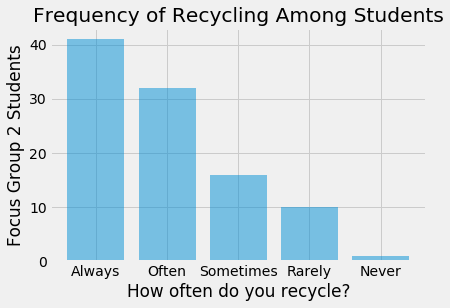

In [10]:
#Initial data analysis with Bar plots on recycling frequency (Focus Group Students)
#we can assume that all first 100 surveys are students since we manually surveyed students with QR codes on our phones

plt.style.use('fivethirtyeight')
x = np.arange(5)

plt.bar(x, df1['Frequency'].value_counts(), align='center', alpha=0.5)
plt.xticks(x, ('Always', 'Often', 'Sometimes', 'Rarely', 'Never'))
plt.title('Frequency of Recycling Among Students')
plt.xlabel('How often do you recycle?')
plt.ylabel('Focus Group 2 Students')
plt.show()
#cumulative frequency would be cool on the graph above, Pareto Chart

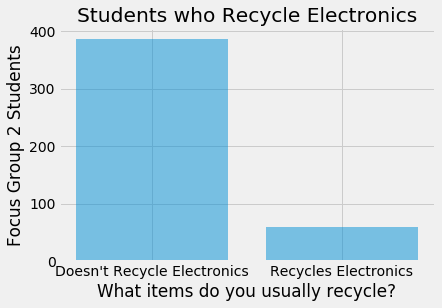

In [11]:
#Data analysis on Items column, specifically electronic subset

AC = df.Items.str.contains(pat = 'Electronics') 
#AC.value_counts().plot(kind='bar'), same as code below without formatting

x = np.arange(2)

plt.bar(x, AC.value_counts(), align='center', alpha=0.5)
plt.xticks(x, ("Doesn't Recycle Electronics", 'Recycles Electronics'))
plt.title('Students who Recycle Electronics')
plt.xlabel('What items do you usually recycle?')
plt.ylabel('Focus Group 2 Students')
plt.show()

#df1.Items.value_counts()

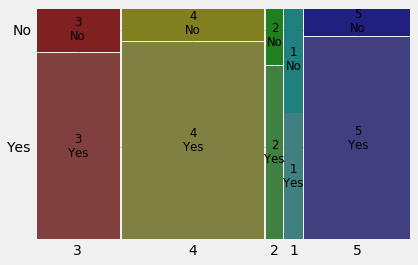

In [12]:
#mosaic plot
m = df.groupby(["Symbol", "Likelihood"]).sum()

mosaic(df, ["Habits", "Symbol"])
plt.show()

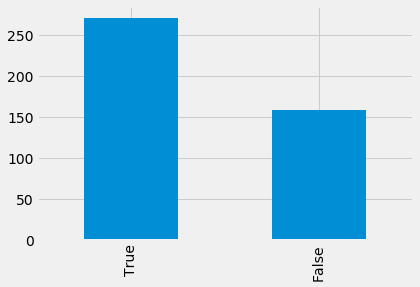

In [13]:
#Data analysis on Reasoning column specifically how manuy people put 'Sustainability' as a reason for them recycling 

df1 = df.Reasoning.str.contains(pat = 'Sustainability')
df1.value_counts()
df1.value_counts().plot(kind='bar')
pl1 = df.Reasoning.str.contains('Sustainability').sum()

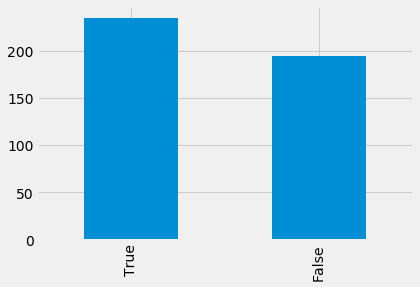

In [14]:
#Data analysis on Reasoning column specifically how manuy people put 'Habit' as a reason for them recycling 
df2 = df.Reasoning.str.contains(pat = 'Habit')
df2.value_counts()
df2.value_counts().plot(kind='bar')
pl2 = df.Reasoning.str.contains('Habit').sum()
#print(df.Reasoning.str.contains('Habit').sum())    

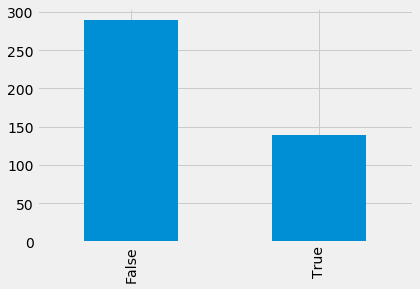

In [15]:
#Data analysis on Reasoning column specifically how manuy people put 'Ease of Access' as a reason for them recycling 
df3 = df.Reasoning.str.contains(pat = 'Ease of Access')
df3.value_counts()
df3.value_counts().plot(kind='bar')
pl3 = df.Reasoning.str.contains('Ease of Access').sum()
#print(df.Reasoning.str.contains('Ease of Access').sum())

271


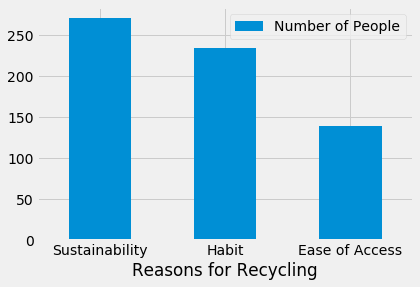

In [16]:
#prints graph of how many people chose what fro their reason for recycling 
#there is more than 100 answers because people could choose more than one thing, to my detriment
print(df.Reasoning.str.contains('Sustainability').sum())    

df4 = pd.DataFrame({'Reasons for Recycling':['Sustainability', 'Habit', 'Ease of Access'], 'Number of People':[pl1, pl2, pl3]}) 
ax = df4.plot.bar(x='Reasons for Recycling', y='Number of People', rot=0)

[None, None, None, None, None, None, None, None, None, None]

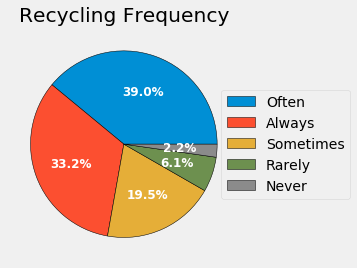

In [23]:
#Jonas' Distaster Area 2.0
#plt.style.use('classic')
#Recycling Frequency Pie Chart

fig1, ax1 = plt.subplots()
labels = df['Frequency'].value_counts().index.tolist()

wedges, texts, autotexts = ax1.pie(df['Frequency'].value_counts(), autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, textprops=dict(color='w'))
ax1.set_title('Recycling Frequency')

ax1.legend(loc="center right", bbox_to_anchor=(1, 0, 0.5, 1), labels= labels)
plt.setp(autotexts, size=12, weight="bold")

Text(0.5, 1.0, 'Number of Students per Gender')

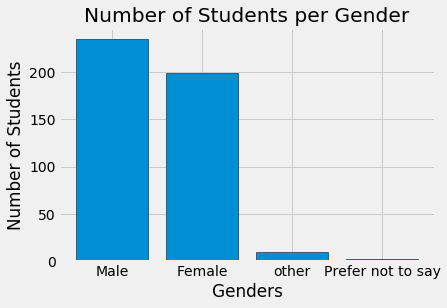

In [18]:
#Gender Bar Graph
fig3, ax3 = plt.subplots()
x = df['Gender'].value_counts().index.tolist()
y = df['Gender'].value_counts().tolist()
ax3.bar(x, y, edgecolor='black')


ax3.set_axisbelow(True)
ax3.set_xlabel('Genders')
ax3.set_ylabel('Number of Students')
ax3.set_title('Number of Students per Gender')

Text(0, 0.5, 'Frequency')

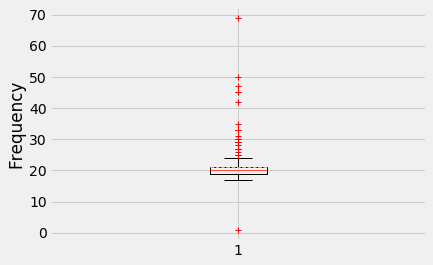

In [19]:
#Age Box Plot
fig4, ax4 = plt.subplots()

ax4.boxplot(df['Age'], meanline=True, showmeans=True, sym='r+')

ax4.set_axisbelow(True)
ax4.set_xlabel('')
ax4.set_ylabel('Frequency')

(<Figure size 432x288 with 3 Axes>,
 OrderedDict([(('Yes', 'Yes'),
               (0.0, 0.0, 0.3673788431474726, 0.8270304658231427)),
              (('Yes', 'No'),
               (0.0,
                0.8303527249593552,
                0.3673788431474726,
                0.16964727504064467)),
              (('No', 'Yes'),
               (0.37232933819697756,
                0.0,
                0.297029702970297,
                0.8830215072565133)),
              (('No', 'No'),
               (0.37232933819697756,
                0.8863437663927258,
                0.297029702970297,
                0.11365623360727402)),
              (("I didn't know there were any recycling rules!", 'Yes'),
               (0.6743095362167796,
                0.0,
                0.3256904637832205,
                0.7973421926910299)),
              (("I didn't know there were any recycling rules!", 'No'),
               (0.6743095362167796,
                0.8006644518272424,
                0.

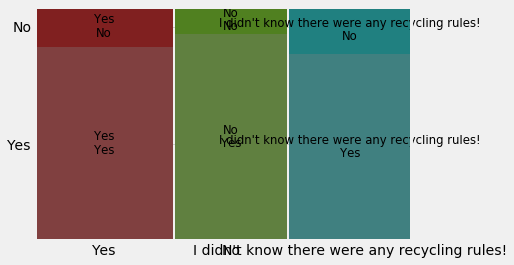

In [20]:
#Rules and likeliehood Mosaic
#m = df.groupby(['Rules','Likelihood']).sum()
mosaic(df, ["Rules", "Likelihood"])


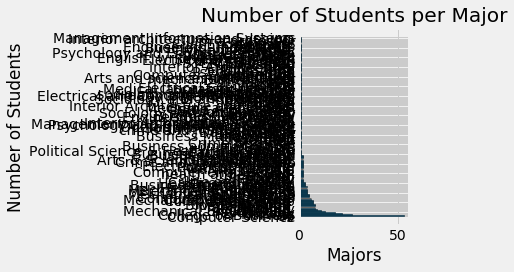

In [21]:
#Major Bar Graph
fig5, ax5 = plt.subplots()
x = df['Major'].value_counts().index.tolist()
y = df['Major'].value_counts().tolist()
ax5.barh(x, y, edgecolor='black')


ax5.set_axisbelow(True)
ax5.set_xlabel('Majors')
ax5.set_ylabel('Number of Students')
ax5.set_title('Number of Students per Major')


plt.tight_layout()
plt.show()